Variables in df1:
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
   Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0   40   M           ATA  ...      0.0        Up             0
1   49   F           NAP  ...      1.0      Flat             1
2   37   M           ATA  ...      0.0        Up             0
3   48   F           ASY  ...      1.5      Flat             1
4   54   M           NAP  ...      0.0        Up             0

[5 rows x 12 columns]
Summary statistics for df1:
              Age   RestingBP  ...     Oldpeak  HeartDisease
count  918.000000  918.000000  ...  918.000000    918.000000
mean    53.510893  132.396514  ...    0.887364      0.553377
std      9.432617   18.514154  ...    1.066570      0.497414
min     28.000000    0.000000  ...   -2.600000      0.000000
25%     47.000000  120.000000  ...    0.000000      

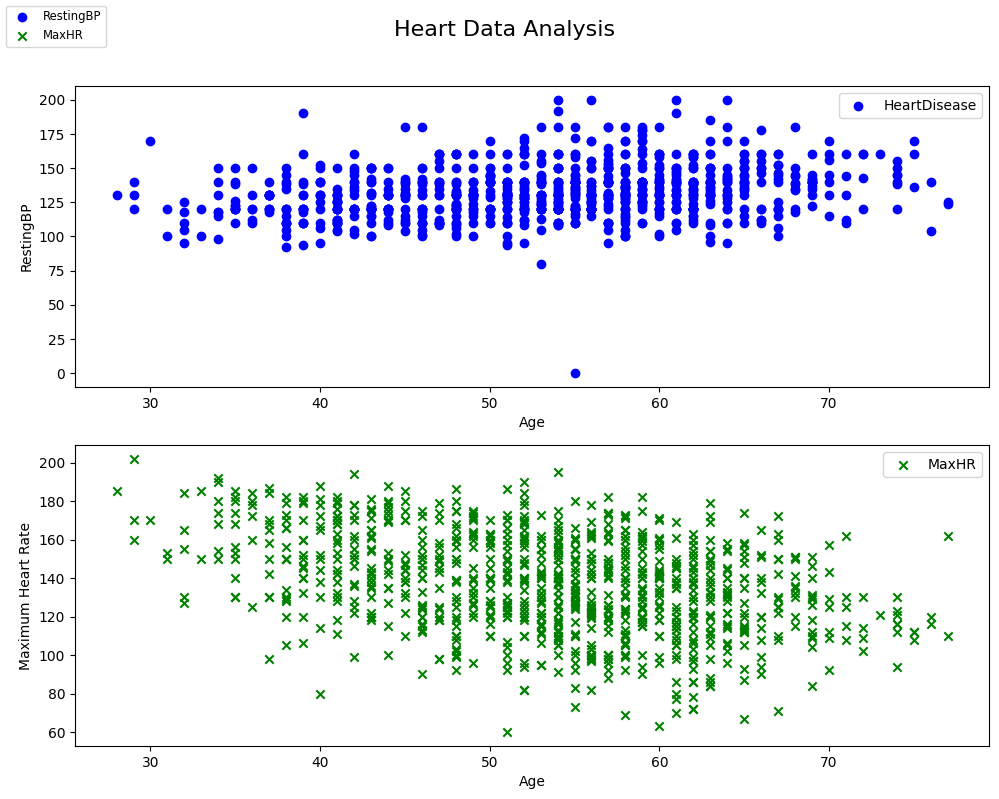

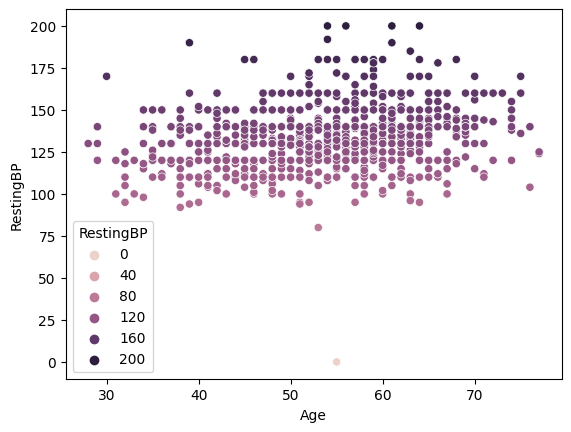

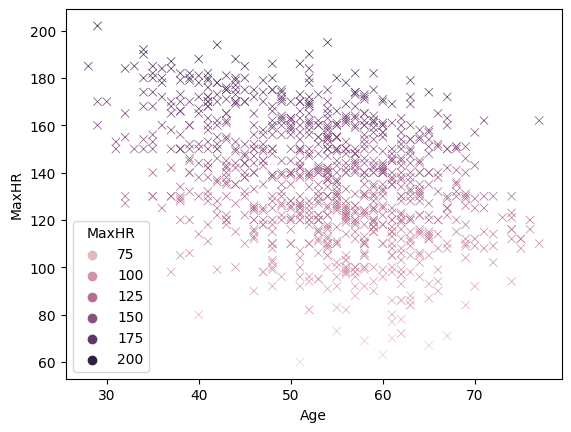

In [2]:
#Assignment 8

#Introduction
#The Kaggle dataset which I have selected for this assignment analyzes factors contributing to heart disease diagnosis. It records both clinical and non-clinical attributes which help determine whether a patient has heart disease. These heart health records are significant in recognizing potential risk factors for heart disease. I selected this dataset after looking at some health related datasets on Kaggle. I would like to analyze some of the risk factor from this dataset.

#The Kaggle dataset can be found using the following link: https://www.kaggle.com/datasets/amirmahdiabbootalebi/heart-disease


#Data Exploration
#Summary statistics means, medians, quartiles,
import pandas as pd
url1 = "https://raw.githubusercontent.com/rkasa01/DATA602_HW8/main/heart.csv"
df = pd.read_csv(url1)
print("Variables in df1:")
print(df.columns)  # Prints variables
print(df.head())

#I first started by importing pandas and loaded the raw link for the dataset. I wanted to take a look at the dataset by printing the first five rows, and printing the variables as well to help see what we are looking at. We see that there are 12 columns in this dataframe, or 12 factors which are used to help identify the presence or absence of heart disease. 

print("Summary statistics for df1:")
print(df.describe()) # Summary statistics for df1
print("\nMissing value information for df1:")
print(df.isnull().sum()) #missing value info
print("\Information about df1:")
print(df.info())

#Here, we have a plethora of useful information. Using the summary statistics, we can find the average, median, and the different quartiles for each of the assessed categories. We can see that there is a count of 918, meaning that 918 patients were observed for the purposes of this data. We see that the mean age of the participants was about 53.51 +/- about 9.43 years, with the median age being 54 years old. The first quartile is at 57, whereas the third is at 60. We can also see summary statistics for the other variables. For example, we can see that the participants had a mean resting blood preasure rate of about 133.40. I don't see any missing data in this dataset. In the next step, I will work to make the data more suitable to answer my question above.


#Data Wrangling
new_order = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS',
             'RestingECG', 'MaxHR', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
df= df[new_order].rename(columns={'ST_Slope': 'HeartrateSlope'})

print(df.head())

#With this dataset, I did not find it necessary to do too much data wrangling. For the purpose of this assignment, I rearranged some of the columns, the way that the data is organized and some of the titles. 


#Visualizations
#Part 1:

# Here, I created two scatterplots. I changed the markers to x and o for each one. I decided to pick two of the observed categories in order to construct these plots, for aesthetic purposes to avoid overcrowding. One scatterplot demonstrates resting blood pressure vs. age, whereas the other one demonstrates maximum heart rate vs. age. I included one legend inside of each scatterplot and one outside for both markers, each with its own color. 

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Scatter plot 1
scatter1 = axes[0].scatter(df['Age'], df['RestingBP'], marker='o', label='HeartDisease', color='blue')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('RestingBP')
axes[0].legend()

#This scatter plot takes the data which recorded resting blood pressure for all patients. Patient age is on the x-axis, whereas the resting blood pressure is on the y-axis. Blood pressure is recorded as a fraction, with the numerator being the systolic pressure and the denominator being the dyastolic pressure. For reference, normal blood pressure should be about 120/80, and with this scatterplot, we can see very high resting blood pressure for the participants. Systolic blood pressure should be around 120, but we see it recorded as high as up to 200 for some patients. This is extremely problematic as it can have detrimental effects on individuals and their health condition, especially over prolonged periods of time. 

# Scatter plot 2
scatter2 = axes[1].scatter(df['Age'], df['MaxHR'], marker='x', label='MaxHR', color='green')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('MaxHR')
axes[1].legend() 
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.suptitle('Heart Data Analysis', fontsize=16)

fig.legend([scatter1, scatter2], ['RestingBP', 'MaxHR'], loc='upper left', fontsize='small') #changing legend font

plt.tight_layout(rect=[0, 0, 1, 0.96])

#This scatter plot takes the data which records the maximum heart rate for all patients. Patient age is on the x-axis, whereas the maximum heart rate is on the y-axis. Heart rate is measured by beats per minute, and a normal heart rate could be anywhere between 60-100 beats per minute. Similar to the previous plot, we see the same phenomenon here. Heart rates in this scatterplot are going as high as up to 200 beats per minute. This is another clear sign of heart disease. In fact, it looks like the majority of patients recorded have an abnormal heart rate.  

# Show the plots
plt.show()


#Part 2:
import seaborn as sns

# Scatter plot 1
sns.scatterplot(x='Age', y='RestingBP', hue='RestingBP', data=df, marker='o')
plt.show()

# Scatter plot 2
sns.scatterplot(x='Age', y='MaxHR', hue='MaxHR', data=df, marker='x')
plt.show()

#It took me a bit longer to figure out how to build the seaborn plots, but after a lot of troubleshooting, they look even better than the two that were previously constructed. With seaborn, the plots are more descriptive. For example, the legends for each of the graphs sorted out the range by using different hues of the same color, making the values easier to identify. This gives us more details about the data just by looking at it. Overall, I am very pleased with how these two plots turned out!

#Part 3:
#In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.

#The differences, based on my experience, are that with seaborn, less syntax is required making it more efficient to build visually appealing plots, and the visuals turn out much more descriptive too. Both methods are great, but after exploring around with seaborn, I can understand what makes this option so great. 

#Conclusions
#Through this assignment, I was able to plot the different resting blood pressure values for varying ages among a group of people whose data was recorded for the presence or absence of heart disease. I was able to do the same for maximum heart reate. Throguh these two plots, I was able to also learn how to become more comfortable using matplotlib, and also seaborn. I would say that this data further needs to be evaluated. I would probably separate the group without heart disease and consider them a control group, and then further analyze the group with heart disease to see which factor is the most significant indicator of heart disease. This type of information is extremely helpful to spread awareness and preventative measures for heart disease.